In [1]:
import sys
import numpy as np
import pandas as pd
import torch

In [2]:
from torchsummary import summary

In [3]:
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from utils.plotting import *

In [4]:
tensor_1 = torch.tensor([1,2,3]) #initialize with a default list object
tensor_2 = torch.tensor([1,2,3],dtype = torch.float32) #initialize with list object (dtype =float32)
tensor_3 = torch.tensor(np.array([1,2,3]))

In [5]:
for t in [tensor_1, tensor_2, tensor_3]:
    print(f"{t}, dtype = {t.dtype}")

tensor([1, 2, 3]), dtype = torch.int64
tensor([1., 2., 3.]), dtype = torch.float32
tensor([1, 2, 3]), dtype = torch.int64


In [9]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [7]:
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [10]:
torch.randn(3,2) #rand -> random; n stands for normal distribution

tensor([[0.1048, 0.3591],
        [0.1340, 0.6862],
        [0.5992, 1.1242]])

In [11]:
torch.rand(3,2) #rand -> random with uniform distribution

tensor([[0.2698, 0.2032],
        [0.6389, 0.6806],
        [0.1791, 0.7487]])

In [12]:
torch.rand(3,2,3)

tensor([[[0.6017, 0.6516, 0.6586],
         [0.1208, 0.5076, 0.7617]],

        [[0.6582, 0.2156, 0.5235],
         [0.6783, 0.6560, 0.4063]],

        [[0.0953, 0.5888, 0.4101],
         [0.3633, 0.6211, 0.1666]]])

In [13]:
a = torch.rand(1,3)
b = torch.rand(3,1)

In [14]:
print(a)

tensor([[0.2972, 0.0333, 0.6635]])


In [15]:
print(b)

tensor([[0.9776],
        [0.2644],
        [0.0573]])


In [16]:
a + b #broadcasting

tensor([[1.2748, 1.0109, 1.6410],
        [0.5616, 0.2977, 0.9279],
        [0.3546, 0.0906, 0.7208]])

In [17]:
a * b

tensor([[0.2906, 0.0326, 0.6486],
        [0.0786, 0.0088, 0.1754],
        [0.0170, 0.0019, 0.0380]])

In [18]:
a.mean()

tensor(0.3313)

In [19]:
a.sum()

tensor(0.9940)

In [20]:
a = torch.tensor([1,2,3])
b = torch.tensor([[3],[2],[1]])

In [21]:
print(a)

tensor([1, 2, 3])


In [22]:
print(b)

tensor([[3],
        [2],
        [1]])


In [23]:
a + b

tensor([[4, 5, 6],
        [3, 4, 5],
        [2, 3, 4]])

In [24]:
a * b

tensor([[3, 6, 9],
        [2, 4, 6],
        [1, 2, 3]])

In [25]:
x = torch.rand(5,2)
print(x)

tensor([[0.8508, 0.4341],
        [0.3646, 0.0127],
        [0.2251, 0.5620],
        [0.4474, 0.7252],
        [0.3930, 0.8389]])


In [31]:
print(x[1:3,0])

tensor([0.3646, 0.2251])


Make a neural network for linear regression

In [36]:
x,y = make_regression(n_samples=500,n_features=1,
                      random_state=42,noise=10.0)

In [44]:
#plot_regression(x,y)

In [43]:
sk_model = LinearRegression().fit(x,y)
#sk_model.predict(x)

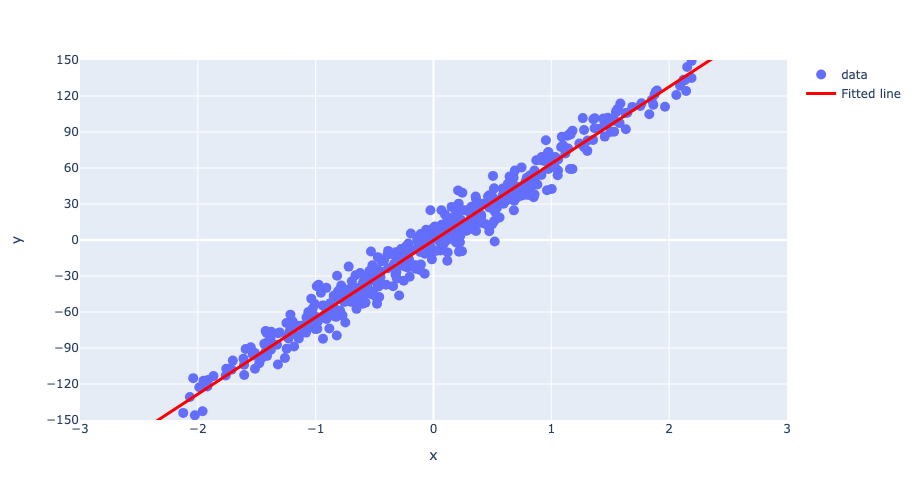

In [42]:
plot_regression(x,y,sk_model.predict(x))

In [45]:
print(f"w_1 : {sk_model.coef_[0]:.2f} (weight)")
print(f"w_0 : {sk_model.intercept_:.2f} (bias)")

w_1 : 64.03 (weight)
w_0 : -0.39 (bias)


$$\hat{y} = -0.39 + 64.04x$$

1. in pytorch, we have to inherit our NN from torch.nn.Module
2. inherit allows you to use the commonly need function from pytorch
3. Some common methods won't have to be reimplement by yourslef, such as .fit() .predict() and .score()
4. we have to override at least two methods: $$__init__()$$ constructor and $$forward()$$

In [48]:
#lets create a model called LinearRegression using Pytorch
class linearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        # super().__init__() makes our class inherit everything form torch.nn.Module
        self.linear = nn.Linear(input_size,output_size)
        # nn.Linear is a linear layer y = wx + b
    def forward(self, x):
        return self.linear(x)
    

In [49]:
torch_model = linearRegression(input_size=1,output_size=1)

In [51]:
print(torch_model)

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [52]:
summary(torch_model,(1,));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1]                   2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


In [53]:
x_train = torch.tensor(x,dtype = torch.float32)
y_train = torch.tensor(y,dtype = torch.float32)

In [54]:
y_pre = torch_model(x_train[0]).item()

In [56]:
print(f"Predict value : {y_pre:.2f}")
print(f"actural value : {y_train[0]:.2f}")

Predict value : -0.42
actural value : -47.40


1. we need a loss function (MSE). In torch, we called it criterion. torch.nn.MSELoss()
2. we also need a optimization algorithm to help optimise the trainable model parameters. torch.optim.SGD

In [58]:
LEARNING_RATE = 0.1
criterion = nn.MSELoss() # loss function
optimizer = torch.optim.SGD(torch_model.parameters(),lr=LEARNING_RATE)

1. we will use the BATCH_SIZE for batch training
2. we have to ceate a dataset for pytorch to train our model
3. the training process needs a dataloader to feed data smoothly

In [59]:
BATCH_SIZE = 50
dataset = TensorDataset(x_train,y_train)
dataloader = DataLoader(dataset,batch_size=BATCH_SIZE,shuffle=True)

In [60]:
print(f"Total number of batches: {len(dataloader)}")

Total number of batches: 10


In [61]:
xx, yy = next(iter(dataloader))
print(f"Shape of feature data (x) in batch : {xx.shape}")
print(f"Shape of label data (y) in batch : {yy.shape}")

Shape of feature data (x) in batch : torch.Size([50, 1])
Shape of label data (y) in batch : torch.Size([50])


In [66]:
def trainer(model,criterion,optimizer,dataloader,epochs=5,verbose=True):
    """sample training wrapper"""
    for epoch in range(epochs):
        losses = 0
        for x, y in dataloader:
            #clear graidients
            optimizer.zero_grad()
            #forward passing
            y_hat = model(x).flatten()
            #calculate loss
            loss = criterion(y_hat,y)
            #evalute gradient
            loss.backward()
            #update parameters
            optimizer.step()
            #add loss for the current batch
            losses += loss.item()
        if verbose : print(f"epoch: {epoch +1},loss:{losses/len(dataloader):.4f}")
            
            

In [67]:
trainer(torch_model,criterion,optimizer,dataloader)

epoch: 1,loss:99.1918
epoch: 2,loss:99.3764
epoch: 3,loss:99.3352
epoch: 4,loss:99.3021
epoch: 5,loss:99.5010


In [65]:
pd.DataFrame({"w_0": [sk_model.intercept_,
                      torch_model.state_dict()['linear.bias'].item()],
              "w_1": [sk_model.coef_[0],
                      torch_model.state_dict()['linear.weight'].item()]},
             index=['sklearn','pytorch']).round(2)

,w_0,w_1
sklearn,-0.39,64.03
pytorch,-0.06,63.93
